# Import Library

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Import Dataset

In [134]:
df = pd.read_csv('IMDB-Movie-Data.csv')

# 1. Top 3 rows

In [135]:
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


# 2. Last 3 rows

In [136]:
df.tail(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


# 3. Shape of Dataframe

In [137]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 1000, Columns: 12


# 4. Information about Dataframe

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 5. Check missing values

In [139]:
df.isnull().values.any()

True

In [140]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

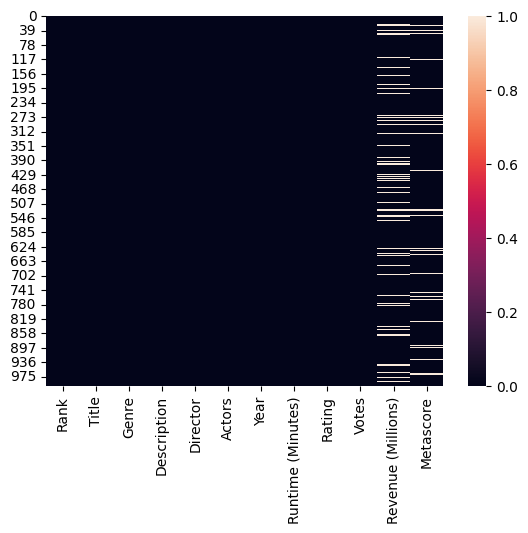

In [141]:
# Heatmap of Null Values
sns.heatmap(df.isnull())

In [142]:
per_missing = df.isnull().sum() * 100 / len(df)
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

# 6. Drop all the missing values

In [143]:
len(df.dropna(axis=0))

838

# 7. Check for Duplicate Data

In [144]:
df.duplicated().any()

False

In [145]:
df = df.drop_duplicates()
len(df)

1000

# 8. Statistics about Dataframe

In [146]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [147]:
df.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


# 9. Display Title of the Movie having Runtime >= 180 Minutes

In [148]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

# 10. In which year there was the highest average voting?

In [149]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

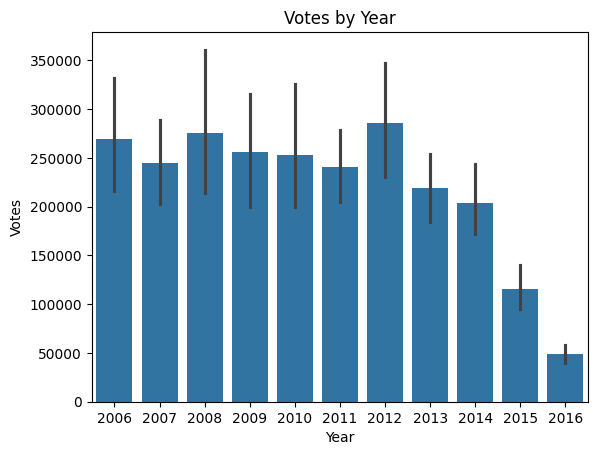

In [150]:
sns.barplot(x='Year', y='Votes', data=df)
plt.title('Votes by Year')
plt.show()

# 11. In which year there was the highest average revenue?

In [151]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

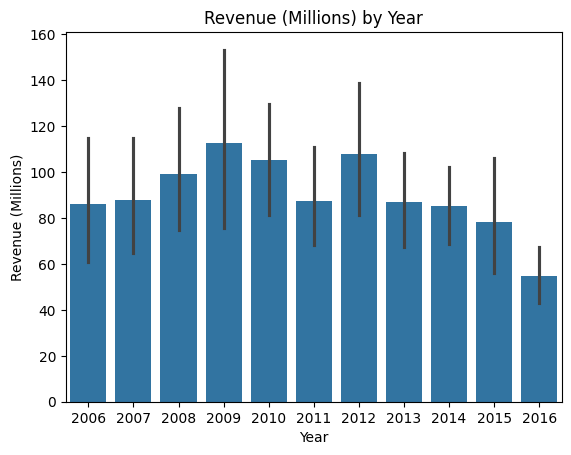

In [152]:
sns.barplot(x='Year', y='Revenue (Millions)', data=df)
plt.title('Revenue (Millions) by Year')
plt.show()

# 12. Find the average rating for each director

In [153]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

# 13. Display Top 10 lengthy movies title and runtime

In [154]:
df.sort_values(by='Runtime (Minutes)', ascending=False).head(10)[['Title', 'Runtime (Minutes)']]

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
965,Inland Empire,180
311,La vie d'Adèle,180
82,The Wolf of Wall Street,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
36,Interstellar,169


In [155]:
df.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']]

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
965,Inland Empire,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169


In [156]:
top_10_len = df.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']] \
    .set_index('Title')
top_10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

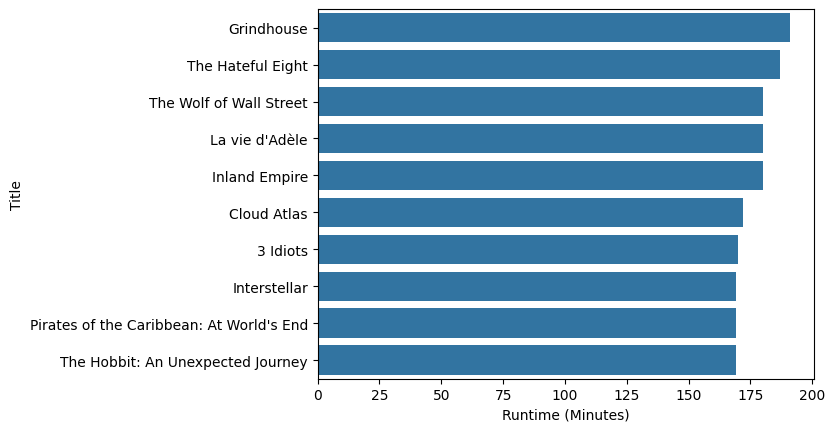

In [157]:
sns.barplot(x='Runtime (Minutes)', y=top_10_len.index, data=top_10_len)

# 14. Display number of movies per year

In [158]:
df['Year'].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

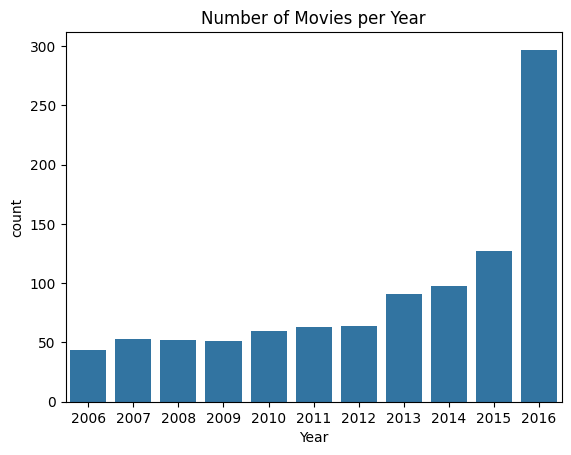

In [159]:
sns.countplot(x='Year', data=df)
plt.title('Number of Movies per Year')
plt.show()

# 15. Find most popular movie title (highest revenue)

In [160]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [161]:
df[df['Revenue (Millions)']==df['Revenue (Millions)'].max()]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# 16. Display Top 10 highest rated movie Titles and its Directors

In [162]:
df.nlargest(10, 'Rating')[['Title', 'Director']]

,Title,Director
54,The Dark Knight,Christopher Nolan
80,Inception,Christopher Nolan
117,Dangal,Nitesh Tiwari
36,Interstellar,Christopher Nolan
96,Kimi no na wa,Makoto Shinkai
249,The Intouchables,Olivier Nakache
64,The Prestige,Christopher Nolan
99,The Departed,Martin Scorsese
124,The Dark Knight Rises,Christopher Nolan
133,Whiplash,Damien Chazelle


In [163]:
top_10 = df.nlargest(10, 'Rating')[['Title', 'Director', 'Rating']].set_index('Title')
top_10

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Dangal,Nitesh Tiwari,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5


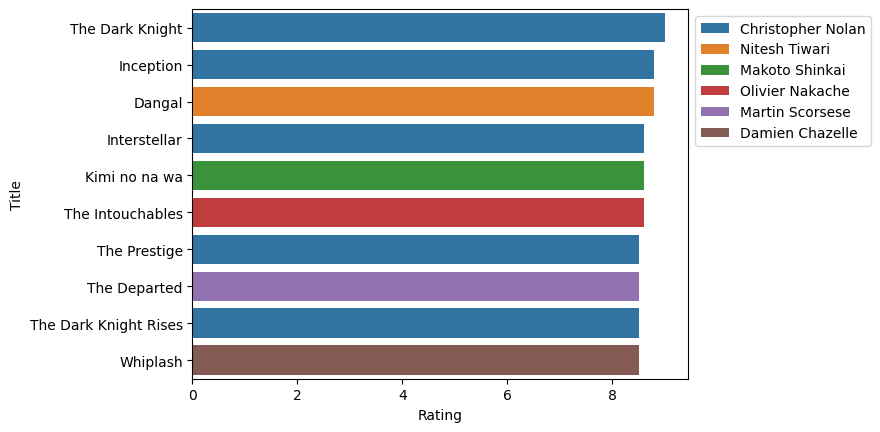

In [164]:
sns.barplot(x='Rating', y=top_10.index, data=top_10, hue='Director')
plt.legend(bbox_to_anchor=(1, 1), loc=0)
plt.show()

# 17. Display Top 10 Highest Revenue Movie Titles

In [165]:
df.nlargest(10, 'Revenue (Millions)')['Title']

50     Star Wars: Episode VII - The Force Awakens
87                                         Avatar
85                                 Jurassic World
76                                   The Avengers
54                                The Dark Knight
12                                      Rogue One
119                                  Finding Dory
94                        Avengers: Age of Ultron
124                         The Dark Knight Rises
578               The Hunger Games: Catching Fire
Name: Title, dtype: object

In [166]:
top_10 = df.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')
top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


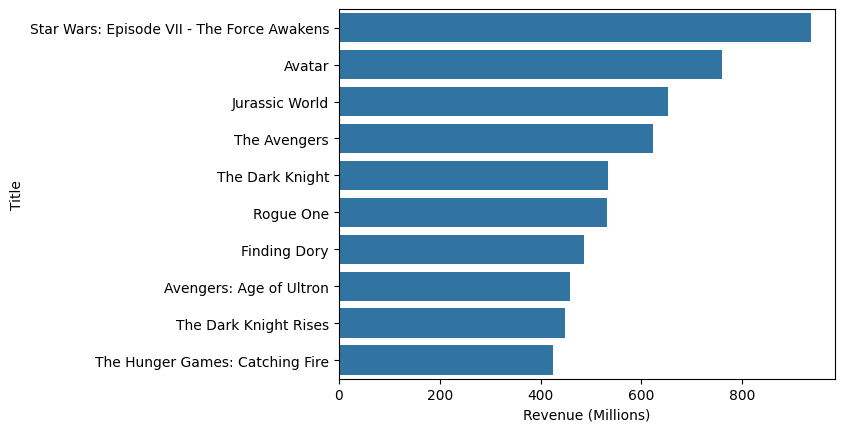

In [167]:
sns.barplot(x='Revenue (Millions)', y=top_10.index, data=top_10)
plt.show()

# 18. Find average rating of movies year wise

In [168]:
df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

# 19. Does Rating affect the Revenue?

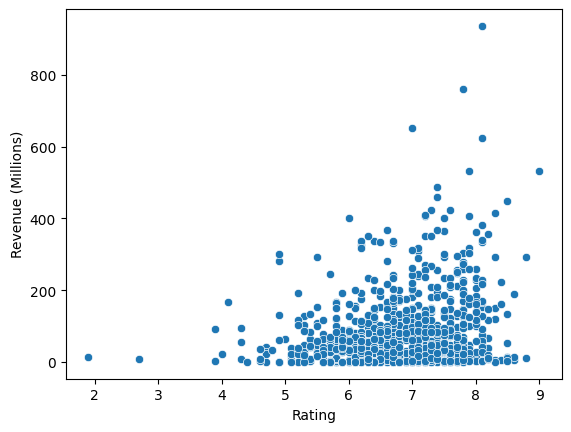

In [169]:
sns.scatterplot(data=df, x='Rating', y='Revenue (Millions)')
plt.show()

# 20. Classify Movies Based on Ratings [Excellent, Good and Average]

In [170]:
def rating(rating):
    if rating>=7.0:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [171]:
df['Rating_category'] = df['Rating'].apply(rating)

In [172]:
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent


# 21. Count number of action movies

In [173]:
len(df[df['Genre'].str.contains('action', case=False)])

303

# 22. Find Unique values from Genre

In [174]:
def split(cell):
    return cell.split(',')

In [175]:
df['Genre_list'] = df['Genre'].apply(split)

In [176]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category,Genre_list
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent,"[Action, Adventure, Sci-Fi]"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent,"[Adventure, Mystery, Sci-Fi]"


In [177]:
unique_list = []
for i in df['Genre_list']:
    for j in i:
        if j not in unique_list:
            unique_list.append(j)

unique_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

# 23. How many films of each genre were made?

In [178]:
one_dim_list = []
for i in df['Genre_list']:
    for j in i:
        one_dim_list.append(j)

one_dim_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [179]:
Counter(one_dim_list)

Counter({'Drama': 513,
         'Action': 303,
         'Comedy': 279,
         'Adventure': 259,
         'Thriller': 195,
         'Crime': 150,
         'Romance': 141,
         'Sci-Fi': 120,
         'Horror': 119,
         'Mystery': 106,
         'Fantasy': 101,
         'Biography': 81,
         'Family': 51,
         'Animation': 49,
         'History': 29,
         'Sport': 18,
         'Music': 16,
         'War': 13,
         'Western': 7,
         'Musical': 5})